In [2]:
import random


def generate_random_value():
    return random.randint(0, 1)


def compute_fitness(individual):
    return sum(gen for gen in individual)


def create_individual(n):
    return [generate_random_value() for _ in range(n)]


def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new


def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = individual[i]
    return individual_m


def selection(sorted_old_population, m):
    index1 = random.randint(0, m - 1)
    index2 = random.randint(0, m - 1)

    while index2 == index1:
        index2 = random.randint(0, m - 1)

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s


In [16]:
n = 20
m = 20
n_generations = 50

fitnesses = []
# create population
population = [create_individual(n) for _ in range(m)]

elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_fitness)

    if i % 1 == 0:
        fitnesses.append(compute_fitness(sorted_population[-1]))
        print("BEST:", compute_fitness(sorted_population[-1]))

    new_population = sorted_population[-elitism:]
    while len(new_population) < m:
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    population = new_population

BEST: 14
BEST: 14
BEST: 15
BEST: 15
BEST: 16
BEST: 16
BEST: 16
BEST: 17
BEST: 17
BEST: 17
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18


In [13]:
sorted_population = sorted(population, key=compute_fitness)
individual_best = sorted_population[-1]
print(individual_best)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]


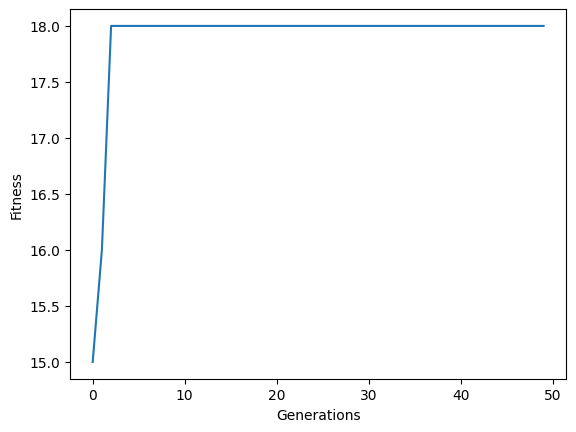

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fitnesses)
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.show()

In [ ]:
import numpy as np
import random
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt("./data/data_GA.csv", delimiter=",", skip_header=1)

X = data[:, :1]
y = data[:, 1]

X = np.c_[np.ones((X.shape[0], 1)), X]
print(X)
print(y)

[[1.   1.2 ]
 [1.   1.86]
 [1.   2.09]
 [1.   3.05]
 [1.   4.69]
 [1.   3.57]
 [1.   5.55]
 [1.   2.39]
 [1.   3.94]]
[2.43 2.91 3.41 4.71 5.94 5.4  7.04 3.38 5.29]


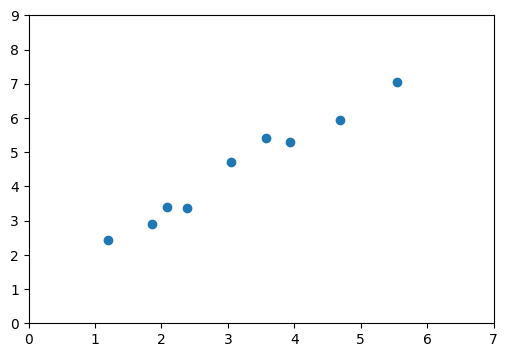

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim((0, 7))
ax.set_ylim((0, 9))

plt.scatter(X[:, 1], y)
plt.show()

In [22]:
def generate_random_value_n(bound=100):
    return (random.random() * 2 - 1) * bound


def compute_loss(individual):
    theta = np.array(individual)
    y_hat = X.dot(theta)
    loss = np.multiply((y_hat - y), (y_hat - y)).mean()
    return loss


def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 0.000001)
    return fitness


def create_individual():
    return [generate_random_value_n() for _ in range(n)]


def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new


def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()

    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value_n()

    return individual_m


def selection(sorted_old_population):
    index1 = random.randint(0, m - 1)
    index2 = random.randint(0, m - 1)

    while index2 == index1:
        index2 = random.randint(0, m - 1)

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [28]:
n = 2
m = 100
n_generations = 3000
losses = []

population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_fitness)
        
    if i%100 == 0:
        losses.append(compute_loss(sorted_population[-1]))
        print("Best loss:", compute_loss(sorted_population[-1]), sorted_population[-1])      
    
    # create new_population
    new_population = sorted_population[-elitism:] 
    
    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)            
            
    # update population
    population = new_population

Best loss: 21.970446613587008 [12.67217695302092, -2.3844800434508873]
Best loss: 21.044490980663042 [11.778986224327381, -2.3441159432157965]
Best loss: 16.094674884123275 [10.434506443333103, -1.9133383138040028]
Best loss: 7.934756712765662 [5.674927276678643, -0.783211690796759]
Best loss: 6.5979450425127295 [6.389807068797015, -0.783211690796759]
Best loss: 5.084997473212144 [6.8294360638701646, -0.4967610552893964]
Best loss: 4.503290742884938 [6.019412138478986, -0.4967610552893964]
Best loss: 3.760127699147095 [6.019412138478986, -0.21664832521601785]
Best loss: 3.0626707621224476 [5.1432442256969635, -0.21664832521601785]
Best loss: 2.4009123163728208 [4.547288368668578, -0.06047362880452489]
Best loss: 2.4009123163728208 [4.547288368668578, -0.06047362880452489]
Best loss: 2.4009123163728208 [4.547288368668578, -0.06047362880452489]
Best loss: 1.924396940463037 [4.547288368668578, 0.08402567526490934]
Best loss: 1.8287527448104608 [4.267028486459168, 0.08402567526490934]
Best

In [29]:
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])

[1.9849754992773416, 0.7772190375815891]


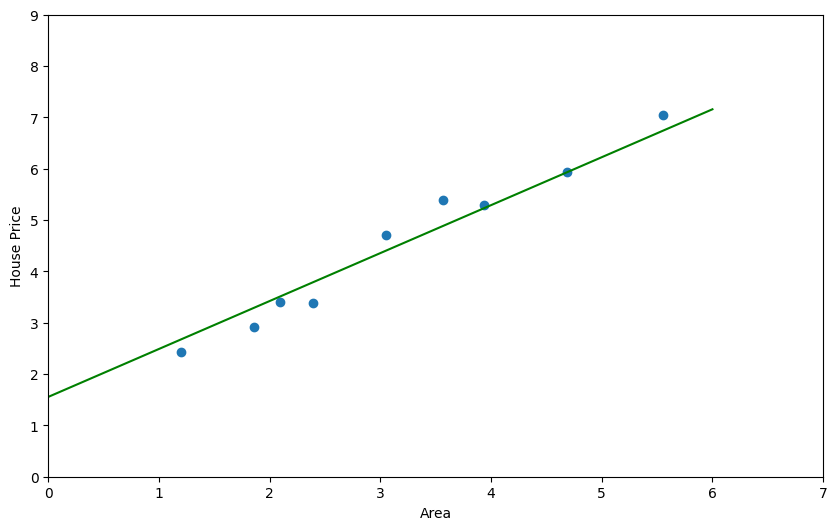

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim((0, 9))
ax.set_xlim((0, 7))

plt.scatter(X[:, 1], y)
plt.ylabel('House Price')
plt.xlabel('Area')

x_data = list(range(0, 7))
y_data = [0.934*x + 1.554 for x in x_data]
plt.plot(x_data, y_data,c='green')    
plt.show()

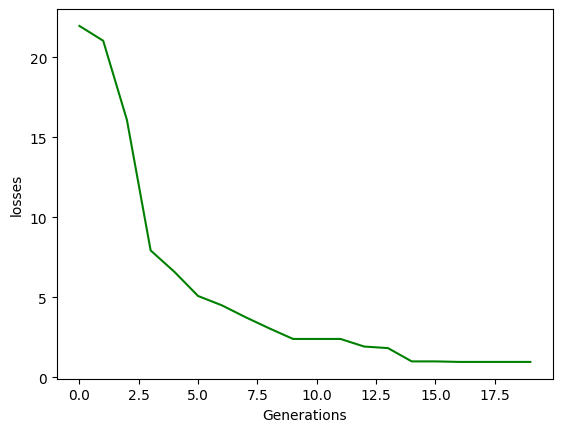

In [32]:
import matplotlib.pyplot as plt

plt.plot(losses[:20], c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()